# <font size=5> UMAP visualization of scGCN, Seurat, GraphCS using three paired cross-species datasets  </font>




In [ ]:
# cd umap_visalization
# get raw data embedding: get_raw_data_embedding.py
# get Seurat embedding:  get_seurat_embedding.R
# get GraphCS embedding: get_GraphCS_embedding.py
# get scGCN embedding:
# cd /competing_methods/scGCN/scGCN
# python train.py --data_name Baron_mouse_Baron_human
# python train.py --data_name Baron_mouse_segerstolpe
# python train.py --data_name Baron_mouse_combination


In [1]:
import numpy as np
from sklearn.metrics import f1_score
import gc
import scipy.sparse as sp
import pandas as pd
from scipy import sparse
from sklearn.decomposition import PCA
import scanpy as sc
from anndata import AnnData
import umap
import matplotlib.pyplot as plt
base = "./umap_visalization/"

In [3]:
def get_umap_for_data(data_name="example"):

    label = pd.read_csv(base+data_name+"/Label.csv", header=0).values.flatten()
    label[label == 'B_cell'] = 'b_cell'
    label[label == 'T cell'] = 't cell'
    label[label == 't cell'] = 't cell'
    label[label == 'activated_stellate'] = 'stellate'
    label[label == 'quiescent_stellate'] = 'stellate'

    embedding_data = pd.read_csv(base + data_name + "/embedding_data.csv", index_col=0, header=0, sep=',').values

    formatting = AnnData(embedding_data)
    formatting.obs["cell_type"] = label

    split_value= name.split('/')
    save_name=split_value[0]+"_"+split_value[1]
    fontsize=15
    sc.pp.neighbors(formatting, n_neighbors=60, use_rep='X', n_pcs=0)#n_pcs
    sc.tl.umap(formatting)
    sc.pl.umap(formatting, color=["cell_type"],
               legend_fontsize=fontsize,
               #legend_loc='EastOutside',
               #save= save_name + ".png"
               )

data_name:  Raw_data/Baron_mouse_Baron_human


/data2/users/zengys/anaconda3/envs/main/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9002. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #274: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
... storing 'cell_type' as categorical


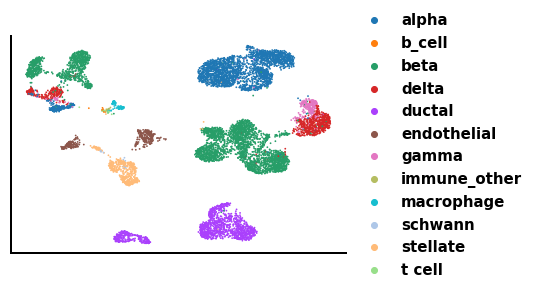

data_name:  Seurat3/Baron_mouse_Baron_human


... storing 'cell_type' as categorical


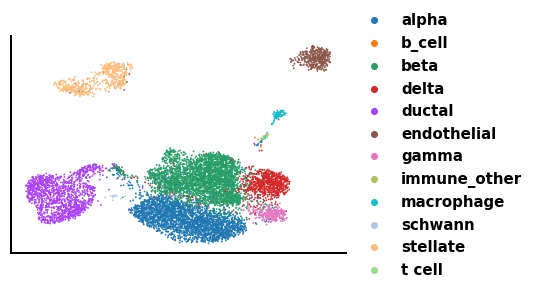

data_name:  scGCN/Baron_mouse_Baron_human


... storing 'cell_type' as categorical


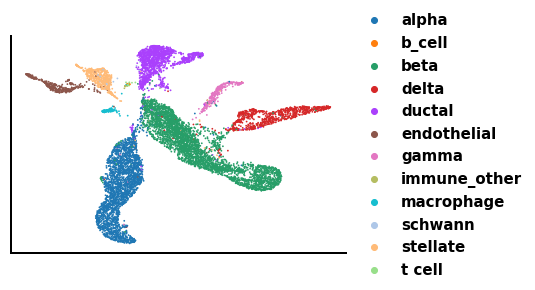

data_name:  GraphCS/Baron_mouse_Baron_human


... storing 'cell_type' as categorical


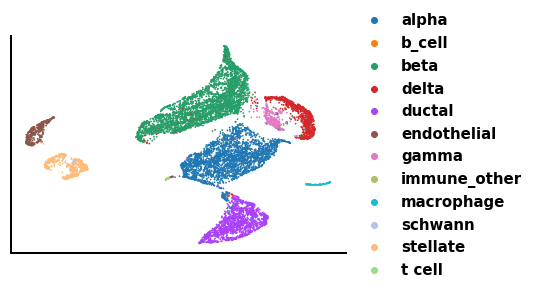

data_name:  Raw_data/Baron_mouse_segerstolpe


... storing 'cell_type' as categorical


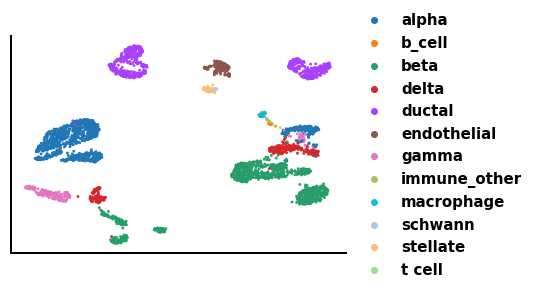

data_name:  Seurat3/Baron_mouse_segerstolpe


... storing 'cell_type' as categorical


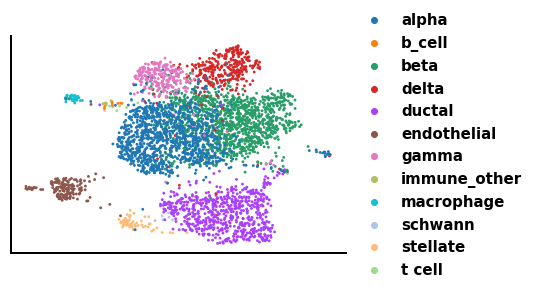

data_name:  scGCN/Baron_mouse_segerstolpe


... storing 'cell_type' as categorical


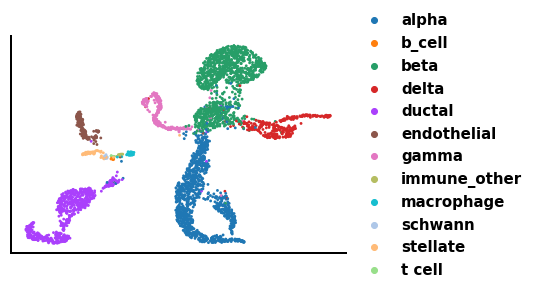

data_name:  GraphCS/Baron_mouse_segerstolpe


... storing 'cell_type' as categorical


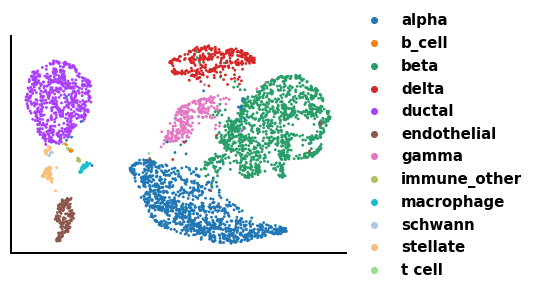

data_name:  Raw_data/Baron_mouse_combination


... storing 'cell_type' as categorical


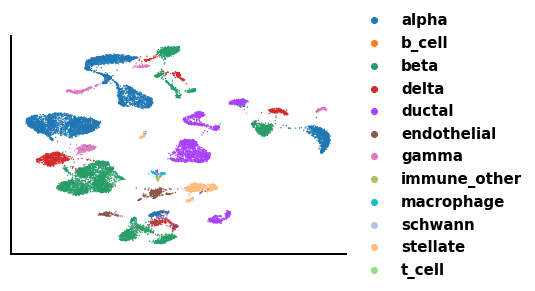

data_name:  Seurat3/Baron_mouse_combination


... storing 'cell_type' as categorical


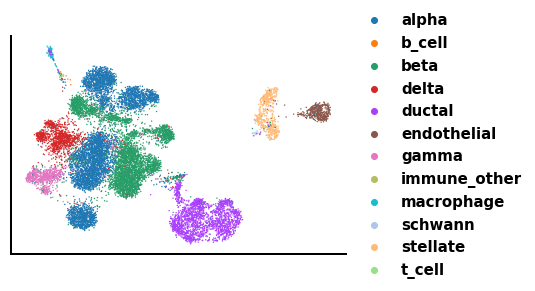

data_name:  scGCN/Baron_mouse_combination


... storing 'cell_type' as categorical


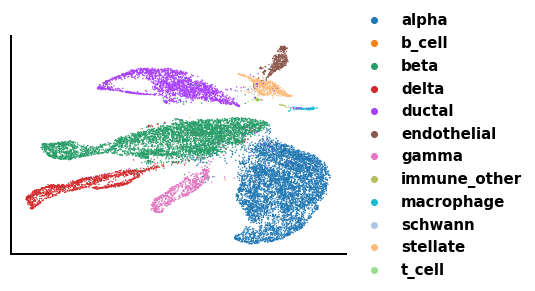

data_name:  GraphCS/Baron_mouse_combination


... storing 'cell_type' as categorical


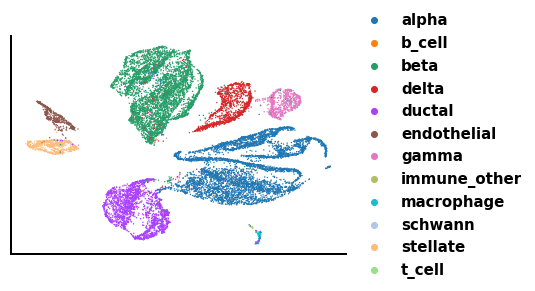

In [4]:
names=[
    "Raw_data/Baron_mouse_Baron_human",
    "Seurat3/Baron_mouse_Baron_human",
     "scGCN/Baron_mouse_Baron_human",
    "GraphCS/Baron_mouse_Baron_human",
    

    "Raw_data/Baron_mouse_segerstolpe",
    "Seurat3/Baron_mouse_segerstolpe",
     "scGCN/Baron_mouse_segerstolpe",
    "GraphCS/Baron_mouse_segerstolpe",


     "Raw_data/Baron_mouse_combination",
     "Seurat3/Baron_mouse_combination",
   "scGCN/Baron_mouse_combination",
    "GraphCS/Baron_mouse_combination",
  
]
for name in names:
    print("data_name: ", name)
    get_umap_for_data(data_name=name)